# **Tidying**

Part of the data engineering process is data cleaning and tidying. What is done in those two processes, is trying to make the data more readable, and complete. This makes much easier to analyze, visualize, and train the data.


## **Data Tidying**

Making the data more organized, and readable is the result of applying data tidying. 

In this section two main pandas functions are used in data tidying those are `melt` and `pivot_table`.

Let's start by taking a look at the below dataframe, which represents the income ranges based on religion. This is part of the PEW research, which is famous in the US for conducting pollings and surveys on citizens.

When the following are satisfied:


1. Each variable forms a column
2. Each observation forms a row
3. Each type of observational unit forms a table

We can then say that our dataset is *tidy*.

First we need to import pandas to read csv datasets.

In [425]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### **PEW Research Dataset**

1. Start by Importing the dataset into a pandas dataframe.

In [426]:
# Importing the pew-raw.csv dataset
print("Load the dataset using the pandas dataframe \n")
dataFrame_pem = pd.read_csv("./CSVs/pew-raw.csv")

Load the dataset using the pandas dataframe 



2. Observe the dataset using the `loc`, `iloc`, `head`, or `tail` approaches

In [427]:
# Displaying the top five rows
print("Displaying the first five rows: \n")
print(dataFrame_pem.head(5))
print("\n")

# Displaying the last four rows
print("Displaying the last four rows: \n")
print(dataFrame_pem.tail(5))
print("\n")

# Access row in the zero index
print("Specific row using the iloc[0]:\n")
print(dataFrame_pem.iloc[0])
print("\n")

# access specific row using loc
print("Specific row using the loc[0]:\n")
print(dataFrame_pem.loc[0,"religion"])
print("\n")

Displaying the first five rows: 

            religion   <$10k   $10-20k  $20-30k  $30-40k   $40-50k  $50-75k
0           Agnostic      27        34       60       81        76      137
1            Atheist      12        27       37       52        35       70
2           Buddhist      27        21       30       34        33       58
3           Catholic     418       617      732      670       638     1116
4  Dont know/refused      15        14       15       11        10       35


Displaying the last four rows: 

                   religion   <$10k   $10-20k  $20-30k  $30-40k   $40-50k  \
5         Evangelical Prot      575       869     1064      982       881   
6                    Hindu        1         9        7        9        11   
7  Historically Black Prot      228       244      236      238       197   
8         Jehovahs Witness       20        27       24       24        21   
9                   Jewish       19        19       25       25        30   

   $50-75k  

***What does not seem right in the above dataframe?***

3. Try to make the column headers represent a variable not a value. For that, use the `melt` function.

In [428]:
# Using the melt function
melted_df = pd.melt(
    dataFrame_pem,
    id_vars='religion',
    var_name='income',
    value_name='count'
)
print("The column headers represent a variable not a value, using melt function \n")
print(melted_df)

The column headers represent a variable not a value, using melt function 

                    religion    income  count
0                   Agnostic     <$10k     27
1                    Atheist     <$10k     12
2                   Buddhist     <$10k     27
3                   Catholic     <$10k    418
4          Dont know/refused     <$10k     15
5          Evangelical Prot      <$10k    575
6                     Hindu      <$10k      1
7   Historically Black Prot      <$10k    228
8          Jehovahs Witness      <$10k     20
9                    Jewish      <$10k     19
10                  Agnostic   $10-20k     34
11                   Atheist   $10-20k     27
12                  Buddhist   $10-20k     21
13                  Catholic   $10-20k    617
14         Dont know/refused   $10-20k     14
15         Evangelical Prot    $10-20k    869
16                    Hindu    $10-20k      9
17  Historically Black Prot    $10-20k    244
18         Jehovahs Witness    $10-20k     27
19   

### **Billboard Dataset**

This dataset outlines data about the top hit songs on the Billboard list and the week from entrance that it was in the billboard with the ranking.

1. Read the dataset and store it in a pandas dataframe. Note that the usual utf-8 encoding does not work on this dataset. The reason behind this is that there might be characters that are not supported by `utf-8`.

The suggestion is to use for this dataset `unicode_escape` encoding. (converts all non-ASCII characters into their \uXXXX representations)

In [429]:
# 1. Load the dataset using `unicode_escape` encoding
billboard_df = pd.read_csv("./CSVs/billboard.csv", encoding="unicode_escape")

2. Observe the first few rows of the dataset.

In [430]:
# Displaying the first few rows of the dataset
print("The initial view of the dataset is")
print(billboard_df.head(10))

The initial view of the dataset is
   year      artist.inverted                                  track  time  \
0  2000      Destiny's Child               Independent Women Part I  3:38   
1  2000              Santana                           Maria, Maria  4:18   
2  2000        Savage Garden                     I Knew I Loved You  4:07   
3  2000              Madonna                                  Music  3:45   
4  2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)  3:38   
5  2000                Janet                  Doesn't Really Matter  4:17   
6  2000      Destiny's Child                            Say My Name  4:31   
7  2000    Iglesias, Enrique                            Be With You  3:36   
8  2000                Sisqo                             Incomplete  3:52   
9  2000             Lonestar                                 Amazed  4:25   

     genre date.entered date.peaked  x1st.week  x2nd.week  x3rd.week  ...  \
0     Rock   2000-09-23  2000-11-18     

***What is wrong with the above dataset?***

3. Let's, again, use the `melt` function to fix the general structure of the dataframe.

In [431]:
# Gather all week columns by using the week dataset
billboard_melted = billboard_df.melt(
    id_vars=["year", "artist.inverted", "track", "time", "genre", "date.entered", "date.peaked"],
    var_name="week",
    value_name="rank"
)
print(billboard_melted.head(10))

   year      artist.inverted                                  track  time  \
0  2000      Destiny's Child               Independent Women Part I  3:38   
1  2000              Santana                           Maria, Maria  4:18   
2  2000        Savage Garden                     I Knew I Loved You  4:07   
3  2000              Madonna                                  Music  3:45   
4  2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)  3:38   
5  2000                Janet                  Doesn't Really Matter  4:17   
6  2000      Destiny's Child                            Say My Name  4:31   
7  2000    Iglesias, Enrique                            Be With You  3:36   
8  2000                Sisqo                             Incomplete  3:52   
9  2000             Lonestar                                 Amazed  4:25   

     genre date.entered date.peaked       week  rank  
0     Rock   2000-09-23  2000-11-18  x1st.week  78.0  
1     Rock   2000-02-12  2000-04-08  x1st.

If we inspect the current dataframe. We find that it is structured in a better way than before. 

However, the ***Week*** column looks a bit ugly!

4. Let's try to place only the week number in that column without the extras surronding it.

In [432]:
# 4. Cleaning the week column (removing 'x' and '.week') and displaying the inital 3 rows
billboard_melted["week"] = billboard_melted["week"].str.extract(r'(\d+)').astype(int)
print(billboard_melted.head(3))

   year  artist.inverted                     track  time genre date.entered  \
0  2000  Destiny's Child  Independent Women Part I  3:38  Rock   2000-09-23   
1  2000          Santana              Maria, Maria  4:18  Rock   2000-02-12   
2  2000    Savage Garden        I Knew I Loved You  4:07  Rock   1999-10-23   

  date.peaked  week  rank  
0  2000-11-18     1  78.0  
1  2000-04-08     1  15.0  
2  2000-01-29     1  71.0  


5. Now let's inspect the ***Week*** column in the dataframe.

In [433]:
# 5. Inspecting cleaned week column
print("\nThe Cleaned 'week' column sample is:")
print(billboard_melted["week"].unique()[:10])


The Cleaned 'week' column sample is:
[ 1  2  3  4  5  6  7  8  9 10]


Next, let's try to find the date at which the song ranked the number that is shown per row.

6. To do that let's first think of the equation that is going to get us the relevant date at which the song ranked the *rth*.



In [434]:
# 6. Compute charting date: date.entered + week offset
# Convert date.entered to datetime
billboard_melted["date.entered"] = pd.to_datetime(billboard_melted["date.entered"], errors="coerce")

# Addtimedelta of (week - 1) as offset weeks to date.entered
billboard_melted["chart.date"] = billboard_melted["date.entered"] + pd.to_timedelta((billboard_melted["week"] - 1) * 7, unit="d")

print(billboard_melted.head(4))

   year  artist.inverted                     track  time genre date.entered  \
0  2000  Destiny's Child  Independent Women Part I  3:38  Rock   2000-09-23   
1  2000          Santana              Maria, Maria  4:18  Rock   2000-02-12   
2  2000    Savage Garden        I Knew I Loved You  4:07  Rock   1999-10-23   
3  2000          Madonna                     Music  3:45  Rock   2000-08-12   

  date.peaked  week  rank chart.date  
0  2000-11-18     1  78.0 2000-09-23  
1  2000-04-08     1  15.0 2000-02-12  
2  2000-01-29     1  71.0 1999-10-23  
3  2000-09-16     1  41.0 2000-08-12  


*Timedeltas are absolute differences in times, expressed in difference units (e.g. days, hours, minutes, seconds). This method converts an argument from a recognized timedelta format / value into a Timedelta type.*


***What is the problem with the calculation above?***

7. Let's only keep necessary columns

In [435]:
# What could go wrong here?
# If `date.entered` is missing or invalid, chart.date will be NaN so,

# 7. Keeping only necessary columns
columns_to_keep = ["artist.inverted", "track", "genre", "week", "rank", "chart.date"]
billboard_cleaned_df = billboard_melted[columns_to_keep]
print(billboard_cleaned_df.head(5))

       artist.inverted                                  track genre  week  \
0      Destiny's Child               Independent Women Part I  Rock     1   
1              Santana                           Maria, Maria  Rock     1   
2        Savage Garden                     I Knew I Loved You  Rock     1   
3              Madonna                                  Music  Rock     1   
4  Aguilera, Christina  Come On Over Baby (All I Want Is You)  Rock     1   

   rank chart.date  
0  78.0 2000-09-23  
1  15.0 2000-02-12  
2  71.0 1999-10-23  
3  41.0 2000-08-12  
4  57.0 2000-08-05  


8. How to rename your columns?

In [436]:
# 8. Renaming the columns
billboard_cleaned = billboard_cleaned_df.rename(columns={
    "artist.inverted": "artist",
    "track": "title",
    "genre": "genre",
    "week": "week_number",
    "rank": "weekly_rank",
    "chart.date": "ranking_date"
})


print("Cleaned and then renamed the columns dataset:")
print(billboard_cleaned.head())

Cleaned and then renamed the columns dataset:
                artist                                  title genre  \
0      Destiny's Child               Independent Women Part I  Rock   
1              Santana                           Maria, Maria  Rock   
2        Savage Garden                     I Knew I Loved You  Rock   
3              Madonna                                  Music  Rock   
4  Aguilera, Christina  Come On Over Baby (All I Want Is You)  Rock   

   week_number  weekly_rank ranking_date  
0            1         78.0   2000-09-23  
1            1         15.0   2000-02-12  
2            1         71.0   1999-10-23  
3            1         41.0   2000-08-12  
4            1         57.0   2000-08-05  


Display the dataframe

In the above dataframe, there are some *NaN* values. What are we going to do? <br/>
9. Apply quick data cleaning and then observe the dataset

In [437]:
# 9. Applying quick data cleaning and then observe the dataset
# Checking if NaN values and removing those if required
billboard_cleaned.dropna(inplace=True)
print("\nFinal cleaned Billboard dataset:")
print(billboard_cleaned.head(10))


Final cleaned Billboard dataset:
                artist                                  title    genre  \
0      Destiny's Child               Independent Women Part I     Rock   
1              Santana                           Maria, Maria     Rock   
2        Savage Garden                     I Knew I Loved You     Rock   
3              Madonna                                  Music     Rock   
4  Aguilera, Christina  Come On Over Baby (All I Want Is You)     Rock   
5                Janet                  Doesn't Really Matter     Rock   
6      Destiny's Child                            Say My Name     Rock   
7    Iglesias, Enrique                            Be With You    Latin   
8                Sisqo                             Incomplete     Rock   
9             Lonestar                                 Amazed  Country   

   week_number  weekly_rank ranking_date  
0            1         78.0   2000-09-23  
1            1         15.0   2000-02-12  
2            1        

## **Data Cleaning**

Data cleaning involves removing unwanted characters, imputing, or dropping missing values.

The decision is based on the dataset you have, and the information you can extract from the other columns.


Examples of data cleaning include cleaning:

1.   **Missing Data**
2.   **Irregular Data** (Outliers)
3.   **Unnecessary Data** — Repetitive Data, Duplicates and more
4.   **Inconsistent Data** — Capitalization, Addresses and more








### **Cars Data Set**

Start by reading the dataset related to car models: ./CSVs/cars.csv

In [438]:
# 1. Loading the dataset (skip the first metadata row and use ';' as separator)
cars_dataframe = pd.read_csv("./CSVs/cars.csv", sep=";", skiprows=[1])

# 2. View the first few rows
print("Initial dataset preview:")
print(cars_dataframe.head())

# 3. Check for missing values
print("\nMissing values per column:")
print(cars_dataframe.isna().sum())

# 4. Convert relevant columns to numeric (force coercion of invalid strings)
cars_dataframe["MPG"] = pd.to_numeric(cars_dataframe["MPG"], errors="coerce")
cars_dataframe["Horsepower"] = pd.to_numeric(cars_dataframe["Horsepower"], errors="coerce")
cars_dataframe["Displacement"] = pd.to_numeric(cars_dataframe["Displacement"], errors="coerce")
cars_dataframe["Weight"] = pd.to_numeric(cars_dataframe["Weight"], errors="coerce")

Initial dataset preview:
                         Car   MPG  Cylinders  Displacement  Horsepower  \
0  Chevrolet Chevelle Malibu   NaN          8         307.0       130.0   
1          Buick Skylark 320  15.0          8         350.0         NaN   
2         Plymouth Satellite   NaN          8         318.0       150.0   
3              AMC Rebel SST  16.0          8           NaN       150.0   
4                Ford Torino  17.0          8         302.0       140.0   

   Weight  Acceleration  Model Origin  
0  3504.0          12.0     70     US  
1  3693.0          11.5     70     US  
2  3436.0          11.0     70     US  
3     NaN          12.0     70     US  
4  3449.0          10.5     70     US  

Missing values per column:
Car             0
MPG             3
Cylinders       0
Displacement    1
Horsepower      2
Weight          1
Acceleration    0
Model           0
Origin          0
dtype: int64


First Row seems to be the datatype, we need to remove it

Let's observe the columns with null values.  Either by using the `isnull().sum()` function 

There aren't many missing values. Let's take a glimpse at the percentage of the missing values:

**HINT:** We'll need `Numpy` for the below task.

Around *0.19%* of the values are missing, which isn't a lot. Therefore, we might go with the option of dropping all the rows with null values.

Lets also check dropping the columns

Let's observe how many columns we lost

### **Cars Dataset - Filling in missing values automatically**

Another option is to try and fill in the missing values through imputations.

Let's take the `MPG` column for example. We can fill in the missing values with 0s through the following line of code:

`df_cars.fillna(0) `. 

However, this does not make much sense as there isn't MPG equal to 0. How about we plot the MPG column and if it follows a random distribution we can use the mean of the column to compute the missing values. Otherwise, we can use the median (if there is a skewed normal distribution). However, there might be a better way of imputation which is getting the median or the mean of the MPG of the cars with similar attributes.

If we observe the graph above, we can consider it in a way or another normally distributed. Therefore, we can impute the missing values using the mean.

To compute the mean we need numeric values. However the values in the dataframe are objects. Therefore, we need to change them to numerics so that we can compute them.

Now let's see what is the mean of the MPG column

We can use this mean to compute the missing values since the graph demonstarted a normal distribution

In [439]:
# 5. Handle missing data
cars_dataframe.fillna({"MPG":cars_dataframe["MPG"].median()}, inplace=True)
cars_dataframe.fillna({"Horsepower":cars_dataframe["Horsepower"].median()}, inplace=True)
cars_dataframe.fillna({"Displacement":cars_dataframe["Displacement"].median()}, inplace=True)
cars_dataframe.fillna({"Weight":cars_dataframe["Weight"].median()}, inplace=True)

# 6. Drop any rows still containing NaN
cars_dataframe.dropna(inplace=True)

# 7. Remove duplicate entries
cars_cleaned = cars_dataframe.drop_duplicates()

# 8. Final dataset info
print("\nCleaned dataset info:")
print(cars_cleaned.info())

# 9. Preview cleaned data
print("\nCleaned data sample:")
print(cars_cleaned.head())


Cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car           406 non-null    object 
 1   MPG           406 non-null    float64
 2   Cylinders     406 non-null    int64  
 3   Displacement  406 non-null    float64
 4   Horsepower    406 non-null    float64
 5   Weight        406 non-null    float64
 6   Acceleration  406 non-null    float64
 7   Model         406 non-null    int64  
 8   Origin        406 non-null    object 
dtypes: float64(5), int64(2), object(2)
memory usage: 28.7+ KB
None

Cleaned data sample:
                         Car   MPG  Cylinders  Displacement  Horsepower  \
0  Chevrolet Chevelle Malibu  22.5          8         307.0       130.0   
1          Buick Skylark 320  15.0          8         350.0        92.5   
2         Plymouth Satellite  22.5          8         318.0       150.0   
3         

### **Car Dataset - Simple Imputer**

*SimpleImputer* is a `scikit-learn` class which is helpful in handling the missing data in the predictive model dataset. It replaces the `NaN` values with a specified placeholder.
It is implemented by the use of the `SimpleImputer()` method which takes the following arguments :

`missing_values` : The missing_values placeholder which has to be imputed. By default is NaN

`strategy` : The data which will replace the NaN values from the dataset. The strategy argument can take the values – ‘mean'(default), ‘median’, ‘most_frequent’ and ‘constant’.


Let's start by importing the `SimpleImputer` into our notebook

What we need to do are two essential steps:

1. fit the data (compute the mean / median / most freq)
2. transform the data (place the computed values in the NaN cells)

In [440]:
# Load dataset (skip data type row)
cars_df = pd.read_csv("./CSVs/cars.csv", sep=";", skiprows=[1])

# Convert relevant columns to numeric
numeric_cols = ["MPG", "Displacement", "Horsepower", "Weight", "Acceleration"]
for col in numeric_cols:
    cars_df[col] = pd.to_numeric(cars_df[col], errors="coerce")

# Create an imputer instance with median strategy
imputer = SimpleImputer(strategy="median")

# Apply imputer to numeric columns
cars_df[numeric_cols] = imputer.fit_transform(cars_df[numeric_cols])

# Drop remaining NaNs (if any) and remove duplicates
cars_df.dropna(inplace=True)
cars_cleaned = cars_df.drop_duplicates().reset_index(drop=True)

print("Final cleaned data using SimpleImputer:")
print(cars_cleaned.head())

Final cleaned data using SimpleImputer:
                         Car   MPG  Cylinders  Displacement  Horsepower  \
0  Chevrolet Chevelle Malibu  22.5          8         307.0       130.0   
1          Buick Skylark 320  15.0          8         350.0        92.5   
2         Plymouth Satellite  22.5          8         318.0       150.0   
3              AMC Rebel SST  16.0          8         151.0       150.0   
4                Ford Torino  17.0          8         302.0       140.0   

   Weight  Acceleration  Model Origin  
0  3504.0          12.0     70     US  
1  3693.0          11.5     70     US  
2  3436.0          11.0     70     US  
3  2815.0          12.0     70     US  
4  3449.0          10.5     70     US  


## **Outlier Detection** 


An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects. They can be caused by measurement or execution errors. The analysis for outlier detection is referred to as outlier mining. There are many ways to detect the outliers, and the removal process is the data frame same as removing a data item from the panda’s data frame.



https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/





In [441]:
# 1. Readng and converting the dataset to the datafame
diabetes_data = load_diabetes()
diabetes_df = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)

# 2. Displaying the dataset shape
print("Initial shape:", diabetes_df.shape)
# Displaying the dataset
print(diabetes_df.head())

Initial shape: (442, 10)
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


### Outliers Visualization

#### Visualizing Outliers Using Box Plot
It captures the summary of the data effectively and efficiently with only a simple box and whiskers. Boxplot summarizes sample data using 25th, 50th, and 75th percentiles. One can just get insights(quartiles, median, and outliers) into the dataset by just looking at its boxplot.

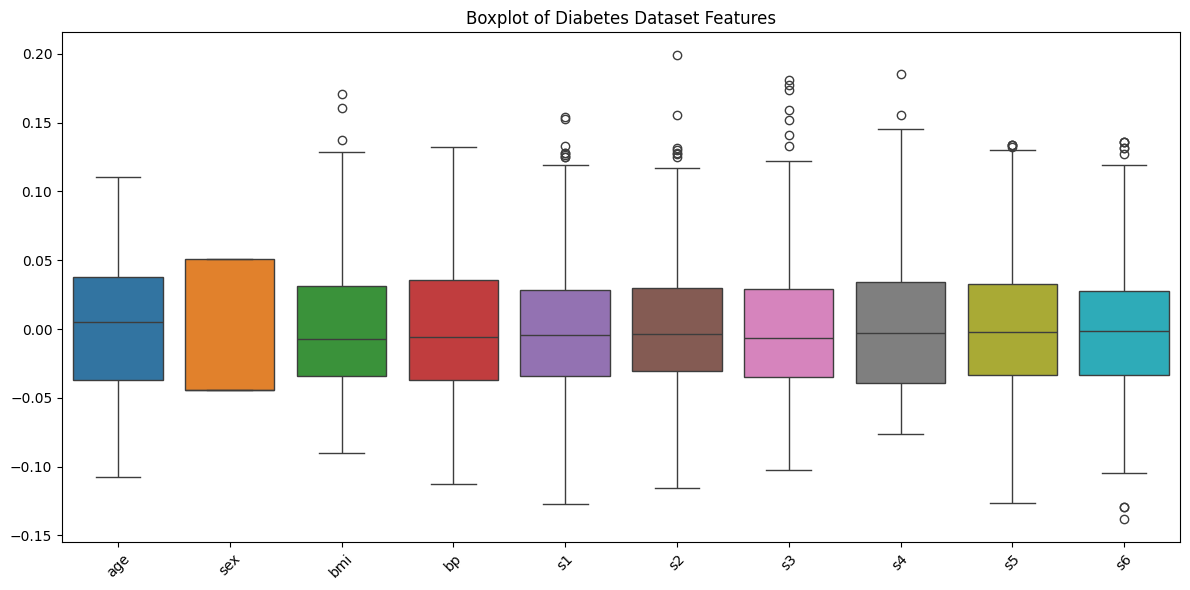

In [442]:
# 3. Visual inspection — Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=diabetes_df)
plt.title("Boxplot of Diabetes Dataset Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Visualizing Outliers Using ScatterPlot.

It is used when you have paired numerical data and when your dependent variable has multiple values for each reading independent variable, or when trying to determine the relationship between the two variables. In the process of utilizing the scatter plot, one can also use it for outlier detection.

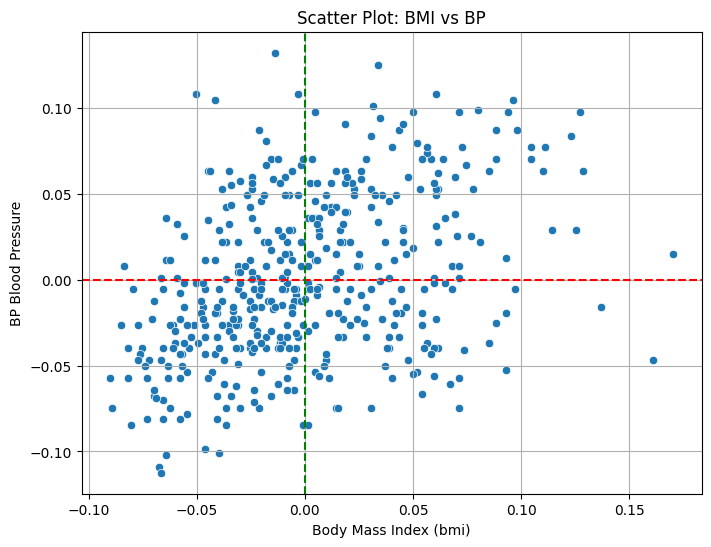

In [443]:
# Scatterplot to detect outliers between two correlated features
plt.figure(figsize=(8, 6))
sns.scatterplot(data=diabetes_df, x='bmi', y='bp')
plt.title("Scatter Plot: BMI vs BP")
plt.xlabel("Body Mass Index (bmi)")
plt.ylabel("BP Blood Pressure")
plt.axhline(y=diabetes_df['bp'].mean(), color='r', linestyle='--', label='Mean BP')
plt.axvline(x=diabetes_df['bmi'].mean(), color='g', linestyle='--', label='Mean BMI')
plt.grid(True)
plt.show()

#### Z-Score:
Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers.
<br>
Zscore = (data_point -mean) / std. deviation



In [444]:
# 4. Calculating the Z-Score Method
z_scores = stats.zscore(diabetes_df)
abs_z_scores = abs(z_scores)
print("\nAbsolute Z-score:", abs_z_scores)


Absolute Z-score: [[0.80050009 1.06548848 1.29708846 ... 0.05449919 0.41853093 0.37098854]
 [0.03956713 0.93853666 1.08218016 ... 0.83030083 1.43658851 1.93847913]
 [1.79330681 1.06548848 0.93453324 ... 0.05449919 0.06015558 0.54515416]
 ...
 [0.87686984 1.06548848 0.33441002 ... 0.23293356 0.98564884 0.32567395]
 [0.9560041  0.93853666 0.82123474 ... 0.55838411 0.93616291 0.54515416]
 [0.9560041  0.93853666 1.53537419 ... 0.83030083 0.08875225 0.06442552]]


Now to define an outlier threshold value is chosen which is generally 3.0. As 99.7% of the data points lie between +/- 3 standard deviation (using Gaussian Distribution approach).

Rows where Z value is greater than 2

In [445]:
filtered_z = (abs_z_scores < 3).all(axis=1)
df_zscore_clean = diabetes_df[filtered_z]
print("\n The Shape after Z-score filtering:", df_zscore_clean.shape)
print("\n The number of rows are \n", df_zscore_clean.shape[0])
print("\n The number of columns are \n", df_zscore_clean.shape[1])


 The Shape after Z-score filtering: (430, 10)

 The number of rows are 
 430

 The number of columns are 
 10


#### IQR (Inter-Quartile Range)
Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field. <Br>
IQR = Quartile3 - Quartile1

In [446]:
# 5. IQR Method (Optional)
Q1 = diabetes_df.quantile(0.25)
Q3 = diabetes_df.quantile(0.75)
IQR = Q3 - Q1

print("\nQ1:\n", Q1)
print("\nQ3:\n", Q3)
print("\nIQR:\n", IQR)


Q1:
 age   -0.037299
sex   -0.044642
bmi   -0.034229
bp    -0.036656
s1    -0.034248
s2    -0.030358
s3    -0.035117
s4    -0.039493
s5    -0.033246
s6    -0.033179
Name: 0.25, dtype: float64

Q3:
 age    0.038076
sex    0.050680
bmi    0.031248
bp     0.035644
s1     0.028358
s2     0.029844
s3     0.029312
s4     0.034309
s5     0.032432
s6     0.027917
Name: 0.75, dtype: float64

IQR:
 age    0.075375
sex    0.095322
bmi    0.065477
bp     0.072300
s1     0.062606
s2     0.060203
s3     0.064429
s4     0.073802
s5     0.065678
s6     0.061096
dtype: float64


To define the outlier base value is defined above and below dataset’s normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :<br>
upper = Q3 + 1.5 * IQR <br>
lower = Q1 - 1.5 * IQR <br> 

In [447]:
# Calculate the upper_bound
upper_bound = Q3 + 1.5 * IQR
# Caculate the lower bound
lower_bound = Q1 - 1.5 * IQR
print("\nUpper Bound:\n", upper_bound)
print("\nLower Bound:\n", lower_bound)


Upper Bound:
 age    0.151139
sex    0.193663
bmi    0.129464
bp     0.144094
s1     0.122267
s2     0.120149
s3     0.125954
s4     0.145012
s5     0.130949
s6     0.119561
dtype: float64

Lower Bound:
 age   -0.150362
sex   -0.187624
bmi   -0.132445
bp    -0.145106
s1    -0.128157
s2    -0.120663
s3    -0.131760
s4    -0.150197
s5    -0.131762
s6    -0.124823
dtype: float64


- Removing the outliers:
For removing the outlier, one must follow the same process of removing an entry from the dataset using its exact position in the dataset because in all the above methods of detecting the outliers end result is the list of all those data items that satisfy the outlier definition according to the method used.

In [448]:
# Calculate the filtered_iqr
filtered_iqr = ~((diabetes_df < upper_bound)) | (diabetes_df > lower_bound).any(axis=1)
diabetes_df_iqr_clean = diabetes_df[filtered_iqr]

print("\nThe Shape after IQR filtering:", diabetes_df_iqr_clean.shape)
print("\nThe number of rows is \n", diabetes_df_iqr_clean.shape[0])
print("\nThe number of columns are \n", diabetes_df_iqr_clean.shape[1])


The Shape after IQR filtering: (442, 10)

The number of rows is 
 442

The number of columns are 
 10
